In [43]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
!pip install python-resize-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Các loại Plot thông dụng

# I) Lineplot 

In [47]:
dataset = pd.read_csv('/content/drive/MyDrive/Data_Vitualization/Dataset/housing_in_london_monthly_variables.csv')
dataset

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1
...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,0
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,0
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,0
13547,2019-12-01,england,250410,E92000001,NaN,NaN,0


In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB


In [49]:
dataset.area.unique()

array(['city of london', 'barking and dagenham', 'barnet', 'bexley',
       'brent', 'bromley', 'camden', 'croydon', 'ealing', 'enfield',
       'tower hamlets', 'greenwich', 'hackney', 'south east',
       'hammersmith and fulham', 'haringey', 'harrow', 'havering',
       'hillingdon', 'hounslow', 'islington', 'kensington and chelsea',
       'kingston upon thames', 'lambeth', 'lewisham', 'merton', 'newham',
       'redbridge', 'richmond upon thames', 'southwark', 'sutton',
       'waltham forest', 'wandsworth', 'westminster', 'inner london',
       'outer london', 'north east', 'north west', 'yorks and the humber',
       'east midlands', 'west midlands', 'east of england', 'london',
       'south west', 'england'], dtype=object)

## 1) Lineplot 1 line cơ bản

In [50]:
cty_price = dataset.iloc[:, :2]
cty_price = dataset.query('area == "london"')
cty_price = cty_price.iloc[:, [0, 2]]
cty_price = cty_price.query('date >= "2019-01-01"')
agg = {'average_price':'mean'}
cty_price = cty_price.groupby(cty_price['date']).aggregate(agg).reset_index()

cty_price

,date,average_price
0,2019-01-01,470067.0
1,2019-02-01,466500.0
2,2019-03-01,464818.0
3,2019-04-01,470092.0
4,2019-05-01,463976.0
5,2019-06-01,471053.0
6,2019-07-01,478348.0
7,2019-08-01,473390.0
8,2019-09-01,477727.0
9,2019-10-01,474318.0


Thông số của line plot:

  plt.plot(
    
    Giá trị của cột x (array), 
    Giá trị của cột y (array)
)

plt.xticks(rotation=90) : Lấy hoặc đặt các vị trí đánh dấu hiện tại và nhãn của trục x (xoay theo 90 độ)

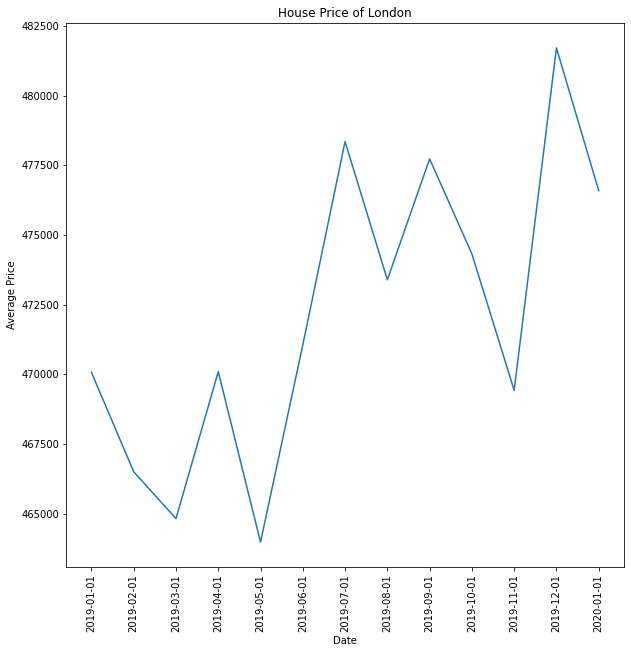

In [51]:
plt.figure(figsize=(10,10))
plt.plot(cty_price.iloc[:, 0].values, cty_price.iloc[:, 1].values)
plt.xticks(rotation=90)
plt.title('House Price of London')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

## 2) Lineplot 1 plot với màu, style plot và marker

Thông số của line plot:

  plt.plot(
    
    Giá trị của cột x (array), 
    Giá trị của cột y (array),
    color= màu của line(mã hex, tên màu), 
    lw= độ rộng của line(pixel), 
    alpha=độ trong suốt của line plot (từ 0 đến 1 nghĩa: từ trong suốt đến rõ nhất),
    ls= style của line,
    marker= style của marker trên line,
    markersize=size của marker(pixel),
    markerfacecolor=màu của marker(mã hex, tên màu),
    markeredgewidth=chiều rộng viền marker(pixel),
    markeredgecolor=viền màu marker(mã hex, tên màu) 
  )

  Link cho các style của line và marker:

  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

  link cho các mã hex của màu sắc:

  https://htmlcolorcodes.com/

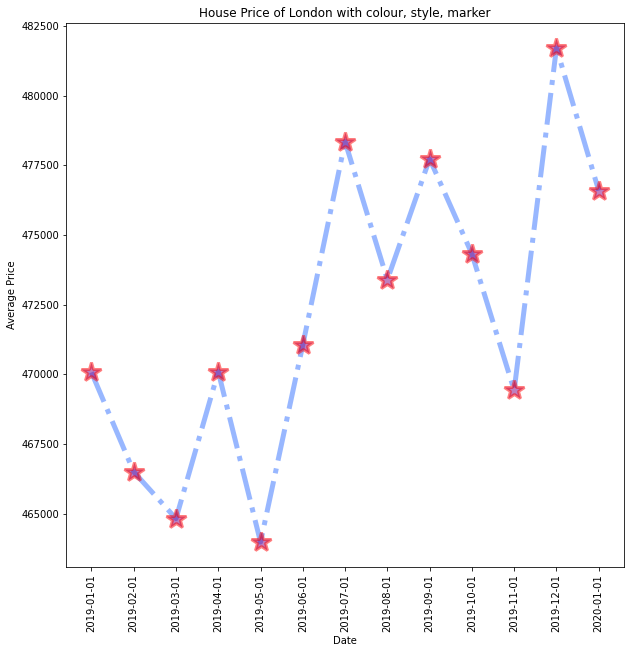

In [52]:
plt.figure(figsize=(10,10))
plt.plot(cty_price.iloc[:, 0].values, 
         cty_price.iloc[:, 1].values,
         color='#3371FF', 
         lw=5, 
         alpha=0.5,
         ls='-.',
         marker='*',
         markersize=20,
         markerfacecolor='purple',
         markeredgewidth=3,
         markeredgecolor='red')
plt.xticks(rotation=90)
plt.title('House Price of London with colour, style, marker')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

## 3) Set 2 lineplot into 1 plot

In [53]:
eng_price = dataset.iloc[:, :2]
#cty_price = cty_price.query('date >= "2019-10-01"')
eng_price = dataset.query('area == "outer london"')
eng_price = eng_price.iloc[:, [0, 2]]
eng_price = eng_price.query('date >= "2019-01-01"')
agg = {'average_price':'mean'}
eng_price = eng_price.groupby(eng_price['date']).aggregate(agg).reset_index()

eng_price

,date,average_price
0,2019-01-01,424913.0
1,2019-02-01,423931.0
2,2019-03-01,420086.0
3,2019-04-01,418651.0
4,2019-05-01,416468.0
5,2019-06-01,419626.0
6,2019-07-01,421871.0
7,2019-08-01,425249.0
8,2019-09-01,425650.0
9,2019-10-01,424913.0


Thông số của line plot:

  plt.plot(
    
    Giá trị của cột x của data set 1 (array), 
    Giá trị của cột y của data set 1 (array),
    label= tên của đường hiển thị data set 1,
  )

  plt.plot(
    
    Giá trị của cột x của data set 2 (array), 
    Giá trị của cột y của data set 2 (array),
    label= tên của đường hiển thị data set 2,
  )


plt.legend(loc=0) : 

  legend của đồ thị nơi hiển thị các label đường hiển thị với "loc=0" nghĩa vị trí của legend sẽ đặt ở location code là 0 tương ứng là vị trí 'best' đồ thị sẽ lựa vị trí hiển thị tốt nhất tuy nhiên sẽ hơi chậm đối với lượng dữ liệu lớn cần hiển thị

plt.yticks([400000, 450000, 500000]) : 

  Lấy hoặc đặt các vị trí đánh dấu hiện tại và nhãn của trục y sẽ hiển thị số trên trục theo list của mình đặt

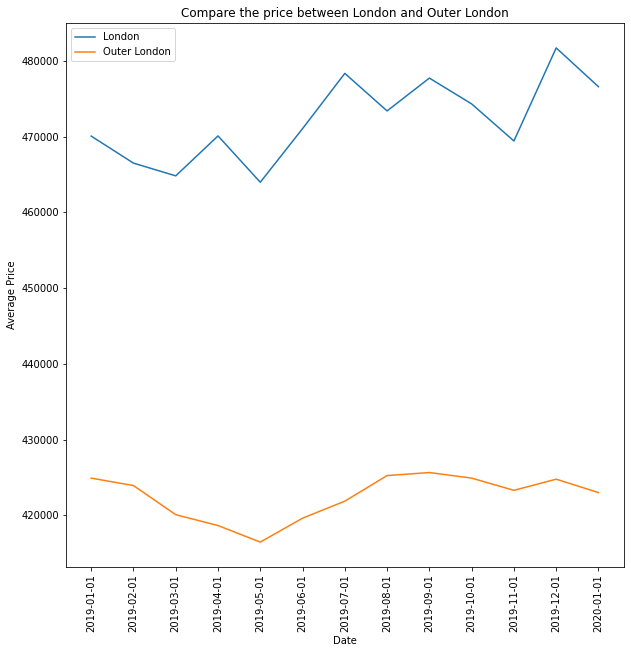

In [54]:
plt.figure(figsize=(10,10))
plt.plot(cty_price.iloc[:, 0].values, 
         cty_price.iloc[:, 1].values,
         label='London')
plt.plot(eng_price.iloc[:, 0].values, 
         eng_price.iloc[:, 1].values,
         label='Outer London')

plt.legend(loc=0)
#plt.yticks([400000, 450000, 500000])
plt.xticks(rotation=90)
plt.title('Compare the price between London and Outer London')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

# II) Scatter Plot

In [55]:
dataset1 = pd.read_csv('/content/drive/MyDrive/Data_Vitualization/Dataset/50_Startups.csv')
dataset1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [56]:
dataset1.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


## 1) Scatter plot (cơ bản)

  plt.scatter(
    
    Giá trị của cột x (array), 
    Giá trị của cột y (array)
)



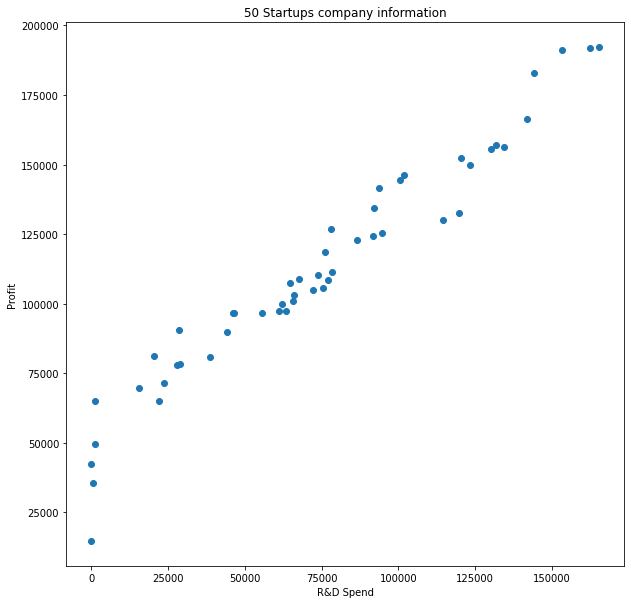

In [57]:
plt.figure(figsize=(10,10))
X_sc = dataset1.iloc[:, 0].values
y_sc = dataset1.iloc[:, 4].values

plt.scatter(X_sc, 
            y_sc)

plt.title('50 Startups company information')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

## 2) Scatter plot với marker

Thông số của line plot:

  plt.scatter(
    
    Giá trị của cột x (array), 
    Giá trị của cột y (array),
    s= size của scatter
    c= màu của line(mã hex, tên màu), 
    marker= style của marker cho scatter plot,
    edgecolor=viền màu marker(mã hex, tên màu)
    linewidth= độ rộng của viền marker(pixel), 
    alpha=độ trong suốt của line plot (từ 0 đến 1 nghĩa: từ trong suốt đến rõ nhất) 
  )

  Link cho các style của line và marker:

  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

  link cho các mã hex của màu sắc:

  https://htmlcolorcodes.com/

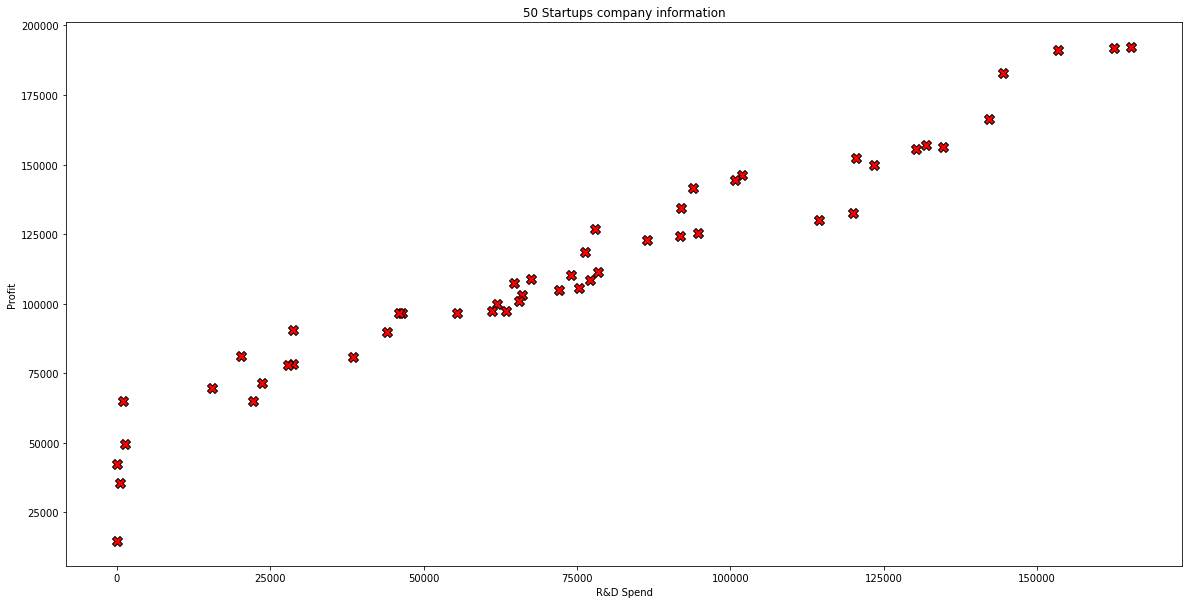

In [58]:
plt.figure(figsize=(20,10))

plt.scatter(X_sc, 
            y_sc, 
            s=100, 
            c='red', 
            marker = 'X',
            edgecolors='black',
            linewidth=1,
            alpha=1)

plt.title('50 Startups company information')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()


## 3) Scatter plot với colour bar

Thông số của line plot:

  plt.scatter(
    
    Giá trị của cột x (array), 
    Giá trị của cột y (array),
    s= size của scatter
    c= sẽ thay thế bằng giá trị của cột giá trị màu (array), 
    cmap = loại colour map,
    marker= style của marker cho scatter plot,
    edgecolor=viền màu marker(mã hex, tên màu)
    linewidth= độ rộng của viền marker(pixel), 
    alpha=độ trong suốt của line plot (từ 0 đến 1 nghĩa: từ trong suốt đến rõ nhất) 
  )

  cbar = plt.colorbar() : hiển thị color bar cho đồ thị
  cbar.set_label('Market Spend') : đặt label cho colour bar

  Link cho các style của line và marker:

  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

  link cho các mã hex của màu sắc:

  https://htmlcolorcodes.com/

  link cho các colour map:

  https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html

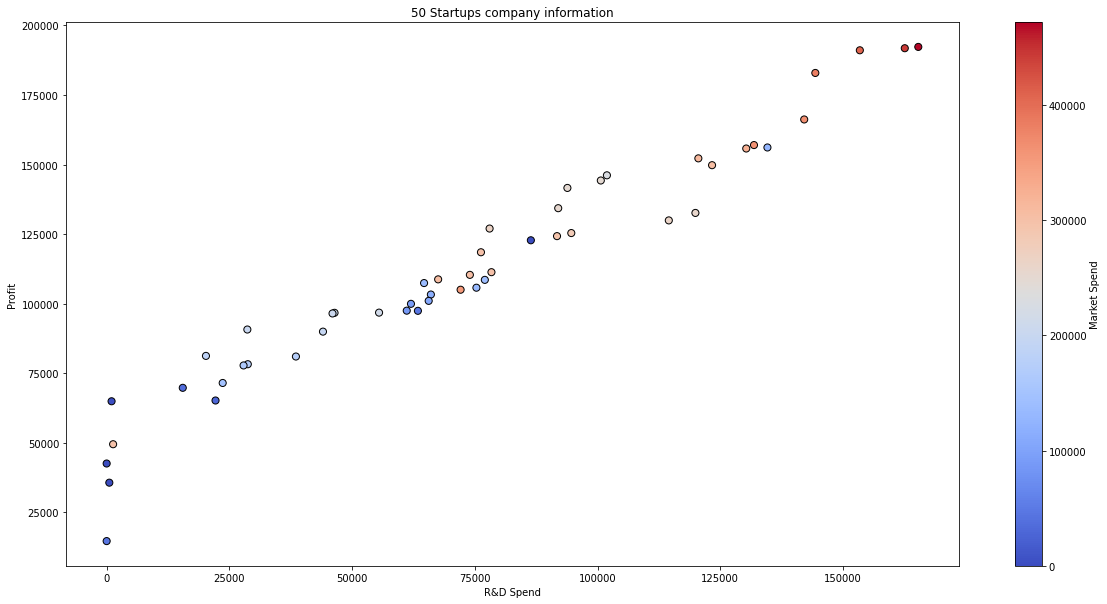

In [59]:
plt.figure(figsize=(20,10))
X_sc = dataset1.iloc[:, 0].values
y_sc = dataset1.iloc[:, 4].values
c_sc = dataset1.iloc[:, 2].values

plt.scatter(X_sc, 
            y_sc, 
            s=50, 
            c= c_sc, 
            cmap = 'coolwarm',
            edgecolors='black',
            linewidth=1,
            alpha=1)

cbar = plt.colorbar()
cbar.set_label('Market Spend')

plt.title('50 Startups company information')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()
plt.show()

# III) Bar Plot

In [60]:
full_eng = dataset.copy()
#full_eng = full_eng.loc[full_eng.area==list[:]]
full_eng = full_eng.query('area == ["north east", "north west", "south east","east midlands", "west midlands", "east of england", "south west", "england"]')
full_eng = full_eng.query('date >= "2019-01-01"')
full_eng

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
10828,2019-01-01,north east,125448,E12000001,2538.0,NaN,0
10829,2019-02-01,north east,124567,E12000001,2618.0,NaN,0
10830,2019-03-01,north east,124963,E12000001,3309.0,NaN,0
10831,2019-04-01,north east,129094,E12000001,2792.0,NaN,0
10832,2019-05-01,north east,128846,E12000001,3288.0,NaN,0
...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,0
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,0
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,0
13547,2019-12-01,england,250410,E92000001,NaN,NaN,0


In [61]:
agg_2 = {'houses_sold':'sum'}
a_hs = full_eng.groupby(full_eng['area']).aggregate(agg_2).reset_index()

a_hs

,area,houses_sold
0,east midlands,68152.0
1,east of england,84264.0
2,england,714972.0
3,north east,34791.0
4,north west,99995.0
5,south east,121399.0
6,south west,83370.0
7,west midlands,73440.0


In [62]:
agg_3 = {'average_price':'mean'}
a_ap = full_eng.groupby(full_eng['area']).aggregate(agg_3).reset_index()

a_ap

,area,average_price
0,east midlands,193523.307692
1,east of england,290037.230769
2,england,247120.615385
3,north east,128570.461538
4,north west,164609.923077
5,south east,321800.153846
6,south west,255967.615385
7,west midlands,198514.615385


In [63]:

eng_fill_fu = full_eng.query('area == "england"')
eng_fill_fu

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
13536,2019-01-01,england,244641,E92000001,54134.0,NaN,0
13537,2019-02-01,england,244582,E92000001,57222.0,NaN,0
13538,2019-03-01,england,243281,E92000001,64940.0,NaN,0
13539,2019-04-01,england,245077,E92000001,59710.0,NaN,0
13540,2019-05-01,england,245255,E92000001,65387.0,NaN,0
13541,2019-06-01,england,246140,E92000001,66723.0,NaN,0
13542,2019-07-01,england,248562,E92000001,70681.0,NaN,0
13543,2019-08-01,england,249432,E92000001,75079.0,NaN,0
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,0
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,0


## 1) Bar plot (basic)

# Thông số Boxplot

  plt.bar(

          Giá trị của cột x,
          Giá trị cho thông số chiều cao đồ thị, 
          color = màu column(mã hex, tên màu)
  )

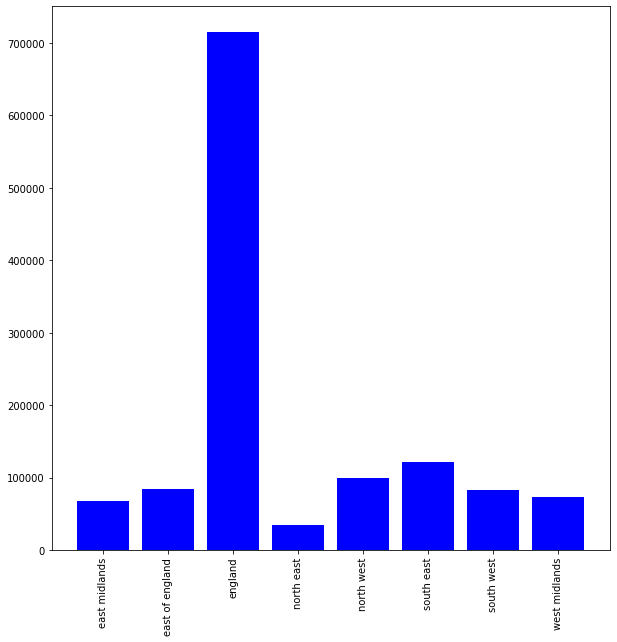

In [64]:
 plt.figure(figsize=(10,10))
 plt.bar(a_hs.area, a_hs.houses_sold, color = 'blue')
 plt.xticks(rotation=90)
 plt.show()

## 1) Bar plot (1 colums and 1 stacked column)

"X_..." : em cần tạo 1 giá trị X cho cột stacked để có giá trị chung khi stack

"y_..." : em cần tạo mỗi phần được stack để cộng lại ở thông số "bottom=" (Giải thích ở phần dưới)

Thông số Barplot:

  Đối với cột barplot riêng:

  plt.bar(

      Giá trị của cột x,
      Giá trị cho thông số chiều cao bar, 
      color = màu column(mã hex, tên màu)
  )

  Đối với cột stacked barplot:

  Ở cột bottom của stacked barplot (có thông số như các bar thường):

  plt.bar(

      Giá trị của cột x,
      Giá trị cho thông số chiều cao bar, 
      color = màu column(mã hex, tên màu)
  )

  Ở cột stacked:

  plt.bar(

      Giá trị của cột x,
      Giá trị cho thông số chiều cao bar, 
      color = màu column(mã hex, tên màu)
      bottom= 
          
          - đối với cột kế cuối sẽ chỉ điền "Giá trị thông số chiều cao của cột bottom"
          - Đối với các cột sau cột kế cuối thì phải cộng hết tất "Giá trị thông số chiều cao của cột trước" với thứ tự là:
                
                 "Giá trị thông số chiều cao"(n - 1) + ... + "Giá trị thông số chiều cao"(- 2) + "Giá trị thông số chiều cao"(- 1) 

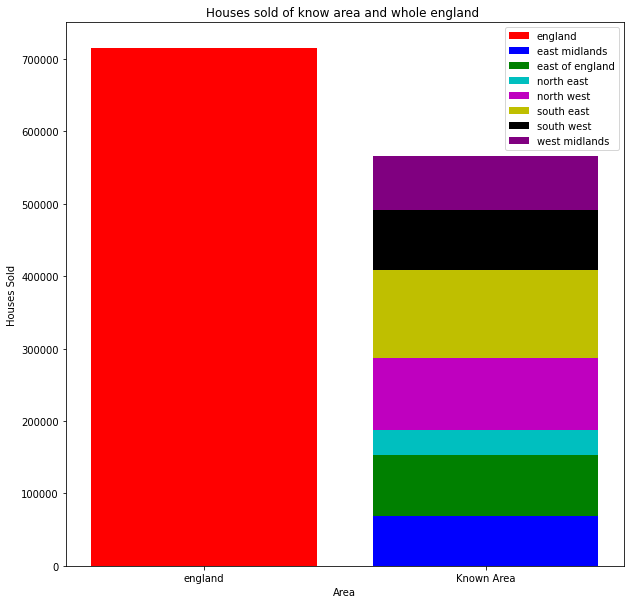

In [65]:
X_area = ['Known Area']
y_em = a_hs.iloc[0,1]
y_ee = a_hs.iloc[1,1]
y_ne = a_hs.iloc[3,1]
y_nw = a_hs.iloc[4,1]
y_se = a_hs.iloc[5,1]
y_sw = a_hs.iloc[6,1]
y_wm = a_hs.iloc[7,1]
y_full = a_hs.iloc[2,1]

plt.figure(figsize=(10,10))
plt.bar(a_hs.iloc[2,0], a_hs.iloc[2,1], color='r')
plt.bar(X_area, y_em, color='b')

plt.bar(X_area, y_ee, bottom=y_em, color='g')
plt.bar(X_area, y_ne, bottom=y_em + y_ee, color='c')
plt.bar(X_area, y_nw, bottom=y_em + y_ee + y_ne, color='m')
plt.bar(X_area, y_se, bottom=y_em + y_ee + y_ne + y_nw, color='y')
plt.bar(X_area, y_sw, bottom=y_em + y_ee + y_ne + y_nw + y_se, color='k')
plt.bar(X_area, y_wm, bottom=y_em + y_ee + y_ne + y_nw + y_se + y_sw, color='purple')

plt.xlabel("Area")
plt.ylabel("Houses Sold")
plt.legend(["england", "east midlands", "east of england", "north east", "north west", "south east", "south west", "west midlands"])
plt.title("Houses sold of know area and whole england ")
plt.show()

## 3) Stacked Barplot



In [66]:
agg_4 = {'R&D Spend':'mean'}
agg_5 = {'Administration':'mean'}
agg_6 = {'Marketing Spend':'mean'}
s_rd = dataset1.groupby(dataset1['State']).aggregate(agg_4).reset_index()
s_ad = dataset1.groupby(dataset1['State']).aggregate(agg_5).reset_index()
s_ms = dataset1.groupby(dataset1['State']).aggregate(agg_6).reset_index()



"X_..." : em cần tạo 1 giá trị X cho cột stacked để có giá trị chung khi stack

"y_..." : em cần tạo mỗi phần được stack để cộng lại ở thông số "bottom=" (Giải thích ở phần dưới)

Thông số Stacked Barplot:

  Cột stacked barplot:

  Ở cột bottom của stacked barplot (có thông số như các bar thường):

  plt.bar(

      Giá trị của cột x,
      Giá trị cho thông số chiều cao bar, 
      color = màu column(mã hex, tên màu)
  )


  Ở cột stacked:

  plt.bar(

      Giá trị của cột x,
      Giá trị cho thông số chiều cao bar, 
      color = màu column(mã hex, tên màu)
      bottom= 
          
          - đối với cột kế cuối sẽ chỉ điền "Giá trị thông số chiều cao của cột bottom"
          - Đối với các cột sau cột kế cuối thì phải cộng hết tất "Giá trị thông số chiều cao của cột trước" với thứ tự là:
                
                 "Giá trị thông số chiều cao"(n - 1) + ... + "Giá trị thông số chiều cao"(- 2) + "Giá trị thông số chiều cao"(- 1) 

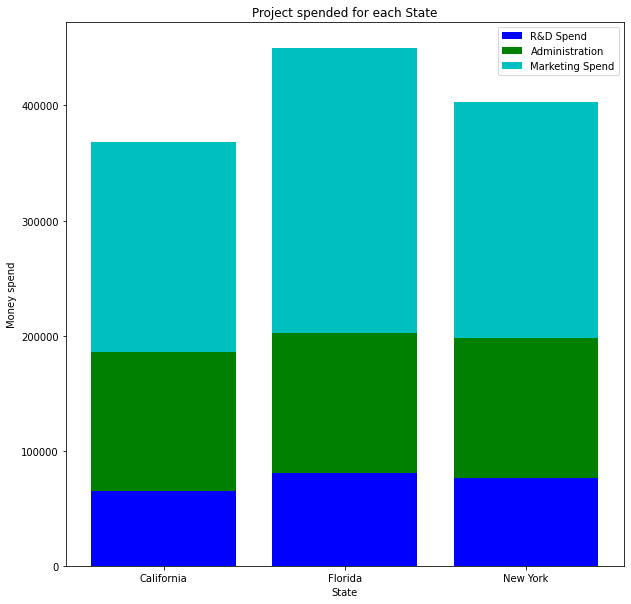

In [67]:
X_state = s_rd.iloc[:,0]
y_rd = s_rd.iloc[:,1].values
y_adm = s_ad.iloc[:,1].values
y_mas = s_ms.iloc[:,1].values
boto2 = np.add(y_rd, y_adm)


plt.figure(figsize=(10,10))
plt.bar(X_state, y_rd, color='b')
plt.bar(X_state, y_adm, bottom=y_rd, color='g')
plt.bar(X_state, y_mas, bottom=boto2, color='c')


plt.xlabel("State")
plt.ylabel("Money spend")
plt.legend(["R&D Spend", "Administration", "Marketing Spend"])
plt.title("Project spended for each State")
plt.show()

## 4) Multiple Barplot

"X_..." : em cần tạo 1 giá trị X cho cột stacked để có giá trị chung khi stack

"y_..." : em cần tạo mỗi phần được stack để cộng lại ở thông số "bottom=" (Giải thích ở phần dưới)

* Với phần Multiple Barplot, em sẽ sử dụng lại thông số X và y của bài Stacked Barplot

"index1 = np.arange(len(X_state))" : em cần tạo lại index mới cho giá trị X để di chuyển bar qua lại

"width1 = 0.2" : set giá trị width để phục vụ cho di chuyển bar và set giá trị của bar width

lý do set một giá trị chung cho width là để thống nhất width của các cột để phục vụ cho việc xếp thứ tự các bar. Ví dụ:

  Khi ta set width của các bar là 0.2 thì khi ở "Giá trị của cột x" muốn di chuyển cột ra trước ta chỉ cân trừ size của width là 0.2 thì cột sẽ đứng trước cột còn lại

Thông số Stacked Barplot:

plt.bar(
  
          Đặt giá trị index mới tạo và (-) cho giá trị width sử dụng cho di chuyển về trước và ngược lại, 
          
          Giá trị cho thông số chiều cao bar,
          
          width = set width cho các bar để phục vụ cho việc xếp thứ tự cột,
          
          color=set màu sắc cho cột (tên màu và mã hex của màu)
          
)

plt.xticks(ticks=index1, labels=X_state) : em phải set lại giá xtick vì sau khi thay đổi bằng giá trị index sẽ không hiện tên mà chỉ có index. Nên:

    ticks=index1: thứ tự của ticks sẽ là index mới tạo

    labels=X_state : sẽ thay thế bằng giá label của giá trị X đã tạo trước đó


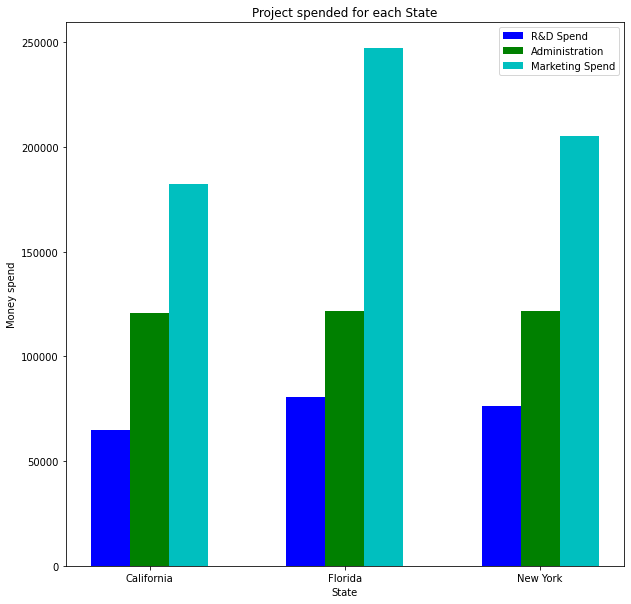

In [68]:
index1 = np.arange(len(X_state))
width1 = 0.2

plt.figure(figsize=(10,10))

plt.bar(index1 - width1, y_rd,width = width1, color='b')
plt.bar(index1, y_adm, width = width1, color='g')
plt.bar(index1 + width1, y_mas,width = width1, color='c')


plt.xlabel("State")
plt.ylabel("Money spend")
plt.xticks(ticks=index1, labels=X_state)
plt.legend(["R&D Spend", "Administration", "Marketing Spend"])
plt.title("Project spended for each State")
plt.show()

# IV) Box plot

## 1) Boxplot (basic)

## Thông số của:
plt.boxplot(
    
    dữ liệu nhập (array, vector),
    vert=True : Tham số cho chiều dọc (True: đứng dọc, False: nằm ngang)
    
)

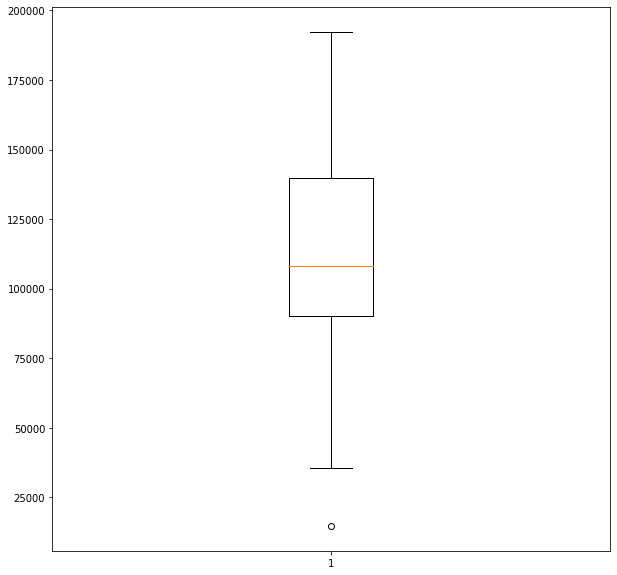

In [69]:
plt.figure(figsize=(10,10))


plt.boxplot(dataset1.iloc[:,-1],vert=True);

## 2) Boxplot customize outline

## Thông số của:

Tạo properties dictionary cho outliner:

    green_diamond = dict(markerfacecolor='g' : màu của outliner là (tên màu), 
                         marker='D' : hình dạng outliner (thông số như hình dạng marker)
                         
)

lý do: properties dictionary là để phục vụ cho thông số flierprops (sẽ minh họa phía dưới)


plt.boxplot(
    
    dữ liệu nhập (array, vector),
    vert=True : Tham số cho chiều dọc (True: đứng dọc, False: nằm ngang),
    flierprops=green_diamond : filier properties là properties của outliner sẽ được nhập bằng dictionary của outliner tạo trên
    
)

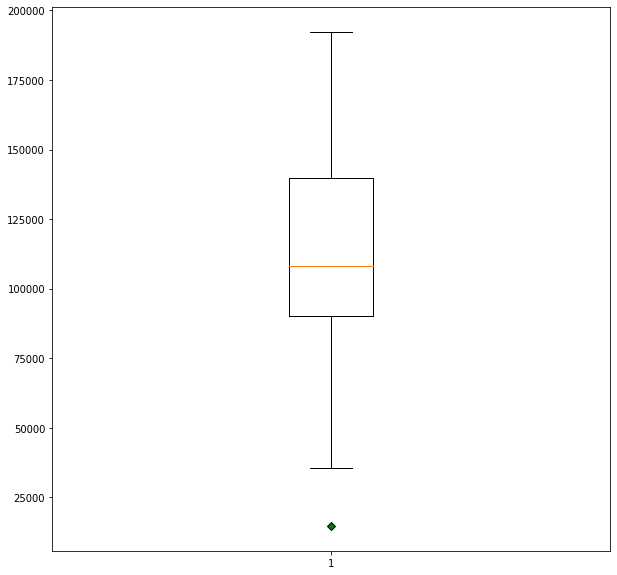

In [70]:
plt.figure(figsize=(10,10))
green_diamond = dict(markerfacecolor='g', marker='D')

plt.boxplot(dataset1.iloc[:,-1],vert=True, flierprops=green_diamond);

## 3) Boxplot with mean

## Thông số của:

Tạo properties dictionary cho mean:

    purple_mean = dict(markerfacecolor='purple', : màu của mean là (tên màu), 
                       markeredgecolor='g', : màu viền của mean là (tên màu) 
                       marker='x': hình dạng mean (thông số như hình dạng marker)
)

lý do: properties dictionary là để phục vụ cho thông số flierprops (sẽ minh họa phía dưới)


plt.boxplot(
    
    dữ liệu nhập (array, vector),
    vert=True, : Tham số cho chiều dọc (True: đứng dọc, False: nằm ngang),
    showmeans=True, : hiện mean và vị trí
    meanprops=purple_mean : mean properties sẽ được nhập bằng dictionary của mean tạo trên
    
)

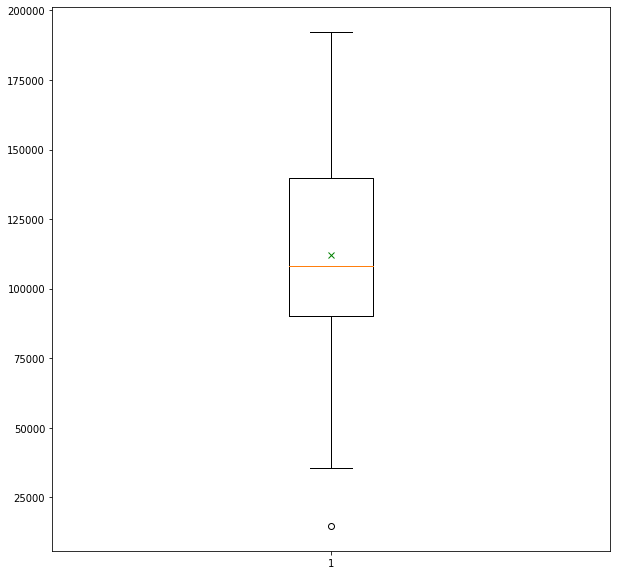

In [71]:
plt.figure(figsize=(10,10))
purple_mean = dict(markerfacecolor='purple',markeredgecolor='g', marker='x')

plt.boxplot(dataset1.iloc[:,-1],vert=True, showmeans=True, meanprops=purple_mean);

## 4) Notched Boxplot 

show approximate 95% confidence intervals for the medians


Notched là chức năng để hiện khoảng tin cậy gần đúng 95% của trung tính

lý do: thấy được khoảng tinh cậy của trung tính)

## Thông số của:

Tạo properties dictionary cho mean:

    purple_mean = dict(markerfacecolor='purple', : màu của mean là (tên màu), 
                       markeredgecolor='g', : màu viền của mean là (tên màu) 
                       marker='x': hình dạng mean (thông số như hình dạng marker)
)

plt.boxplot(
    
    dữ liệu nhập (array, vector),
    vert=True, : Tham số cho chiều dọc (True: đứng dọc, False: nằm ngang),
    showmeans=True, : hiện mean và vị trí
    meanprops=purple_mean, : mean properties sẽ được nhập bằng dictionary của mean tạo trên
    notch=True : hiện chức năng notch thể hiện  khoảng tinh cậy của trung tính
    
)

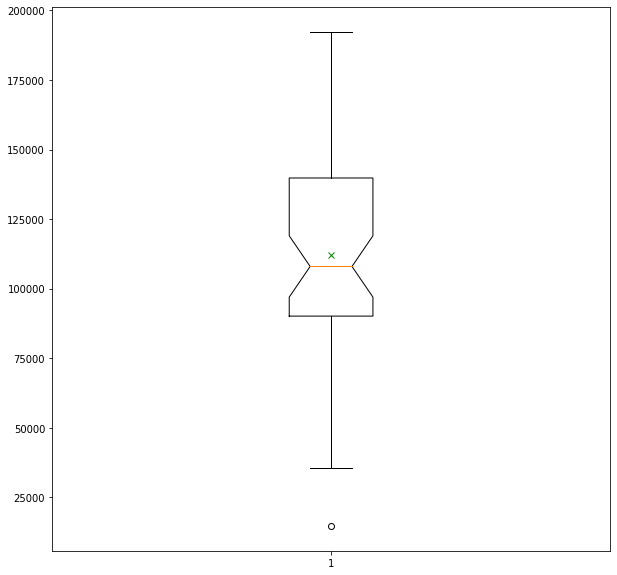

In [72]:
plt.figure(figsize=(10,10))
purple_mean = dict(markerfacecolor='purple',markeredgecolor='g', marker='x')

plt.boxplot(dataset1.iloc[:,-1],vert=True, showmeans=True, meanprops=purple_mean, notch=True);

## 5) Multiple Boxplot 

Dành cho thể hiện nhiều boxplot đại diện cho nhiều giá trị

## Thông số của:

plt.boxplot(
    
    dữ liệu nhập (array, vector),
    vert=True, : Tham số cho chiều dọc (True: đứng dọc, False: nằm ngang),
    patch_artist=True, : mở chức năng patch artist để fill màu cho plot (mặc định là màu xanh)
    notch=False : hiện chức năng notch thể hiện  khoảng tinh cậy của trung tính
    
)

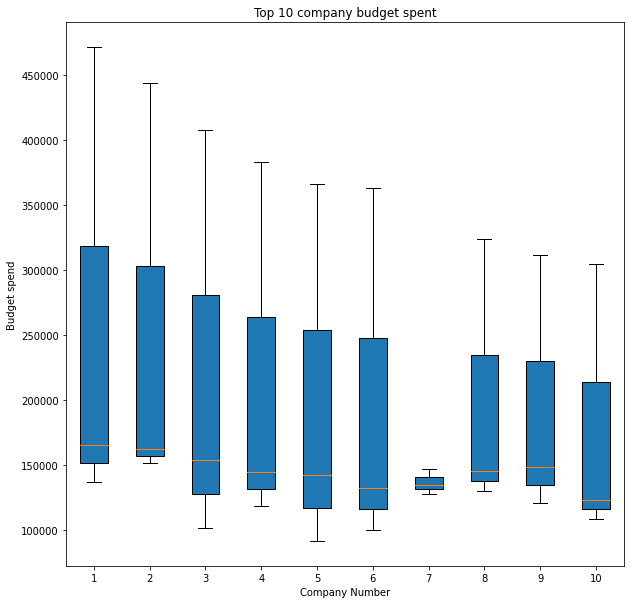

In [73]:
plt.figure(figsize=(10,10))

#plt.boxplot(dataset1.iloc[:10,:-2],vert=True,patch_artist=True, notch=True); 
plt.boxplot(dataset1.iloc[:10,:3],vert=True,patch_artist=True, notch=False);
plt.xlabel("Company Number")
plt.ylabel("Budget spend")
plt.title("Top 10 company budget spent")
plt.show()

# V) Histogram

## 1) Histogram (basic)

## Thông số histogram:

plt.hist(
  
      dữ liệu nhập (array, vector), 
      edgecolor='black' : tạo viền cho mỗi bin
      
);

plt.ticklabel_format(useOffset=False, style='plain') : chuyển tick lable sang số dạng thường: tắt chức năng offset và chuyển style sang plain

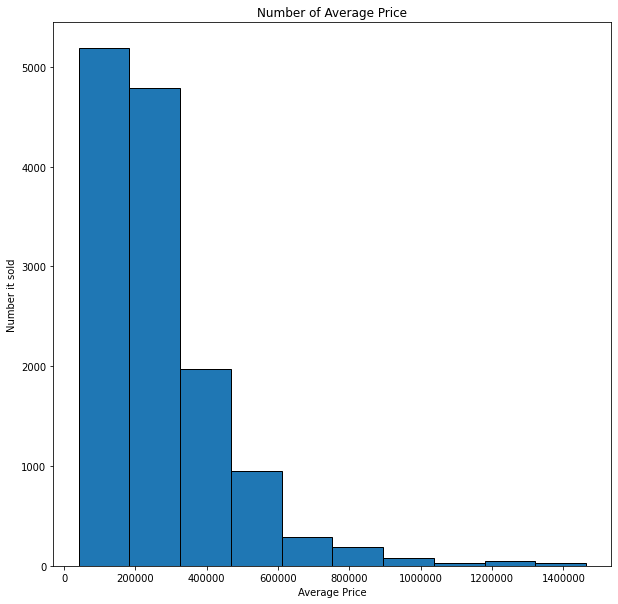

In [74]:
plt.figure(figsize=(10,10))
plt.hist(dataset.iloc[:, 2], edgecolor='black');
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel("Average Price")
plt.ylabel("Number it sold")
plt.title("Number of Average Price")
plt.show()

## 2) Histogram with log

## Thông số histogram:

plt.hist(
  
      dữ liệu nhập (array, vector), 
      edgecolor='black' : tạo viền cho mỗi bin
      log=True : bật chức năng scale log
      
);

plt.ticklabel_format(useOffset=False, style='plain') : chuyển tick lable sang số dạng thường: tắt chức năng offset và chuyển style sang plain

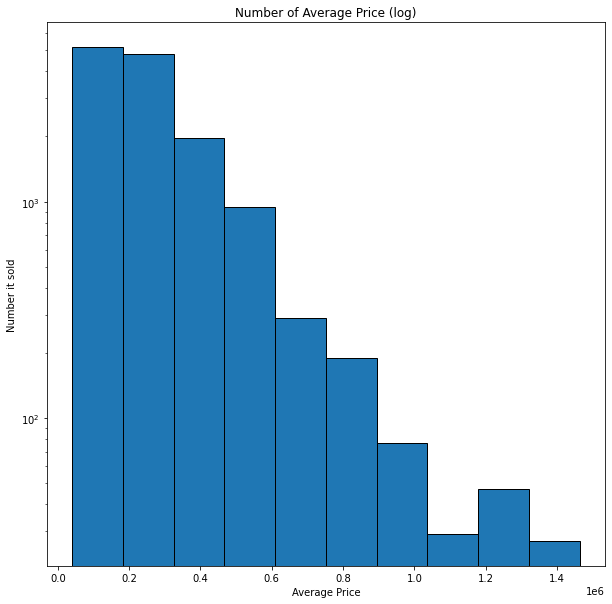

In [75]:
plt.figure(figsize=(10,10))
plt.hist(dataset.iloc[:, 2], edgecolor='black', log=True);
plt.xlabel("Average Price")
plt.ylabel("Number it sold")
plt.title("Number of Average Price (log)")
plt.show()

## 3) Histogram with median line

med = dataset.average_price.median() : tạo thông số median cho axvline (sẽ giải thích ở dưới)

bin = [0, 200000, 400000, 600000, 800000, 1000000, 1200000, 1400000] : tạo một list bin để cho bin trong histogram chạy theo

## Thông số histogram:

plt.hist(
  
      dữ liệu nhập (array, vector), 
      bins =bin : với các bin chạy theo list bin đã tạo
      edgecolor='black' : tạo viền cho mỗi bin
      
);

plt.ticklabel_format(useOffset=False, style='plain') : chuyển tick lable sang số dạng thường: tắt chức năng offset và chuyển style sang plain

plt.axvline(med, color='red', label="Median Price", linewidth=2) : add vertical line với:

     "med" là thông số median đã tạo để đặt vertical line ngay đúng vị trí  
     color='red' : màu của line
     label="Median Price" : label của line
     linewidth=2 : chiều rộng của line

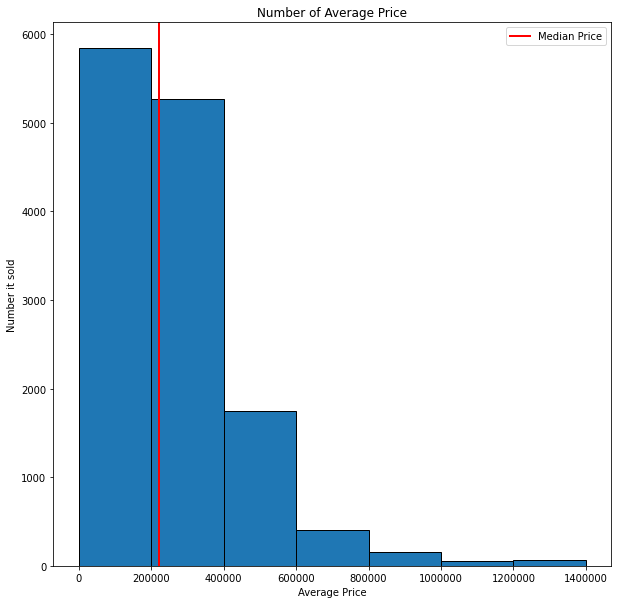

In [76]:
med = dataset.average_price.median()
bin = [0, 200000, 400000, 600000, 800000, 1000000, 1200000, 1400000]

plt.figure(figsize=(10,10))
plt.hist(dataset.iloc[:, 2], bins =bin, edgecolor='black');
plt.ticklabel_format(useOffset=False, style='plain')

plt.axvline(med, color='red', label="Median Price", linewidth=2)
plt.legend()
plt.xlabel("Average Price")
plt.ylabel("Number it sold")
plt.title("Number of Average Price")
plt.show()

# VI) Pie plot

In [77]:
hou_sold = dataset.iloc[:, [0, 1, 4]]
hou_sold = hou_sold.query('area == ["inner london", "outer london"]')
hou_sold = hou_sold.query('date >= "2019-01-01"')
hou_sold = hou_sold.fillna(0)
agg = {'houses_sold':'sum'}
hou_sold = hou_sold.groupby(hou_sold['area']).aggregate(agg).reset_index()

hou_sold

,area,houses_sold
0,inner london,26186.0
1,outer london,45031.0


## Thông số Pie plot


plt.axis("equal") : với chức năng axis chọn giá trị "equal" sẽ khiến cho biểu đồ trở nên cân bằng

plt.pie(
  
        giá trị nhập để tính phần trăm (list, series),

        labels=hou_sold.iloc[:, 0] : set label cho các phần của pie plot (list, series), 

        radius=2.5, : set bán kính cho pie plot sẽ ảnh hưởng kích thước đồ thị

        autopct='%0.2f%%', : set số phần trăm cho các phần của pie plot dưới dạng f-string phần trăm và "0.2f" là set số thập phân sau phẩy là 2 đơn vị ví dụ 36.77

        shadow=True, : set bóng cho pie chart

        explode=[0.5,0], : chọn phần nổi bật trong pie plot với tương ứng thứ tự của các index trong phần "labels" ví dụ:

            [0.5,0] tại vị trí index 0 độ nổi bật là 0.1 và index 1 sẽ giữ nguyên
            
        startangle=45 : set start angle tại góc nào của pie plot ví dụ 45 độ
        
  );

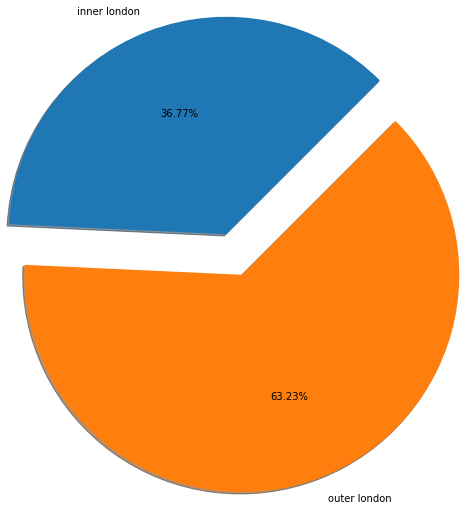

In [78]:

plt.axis("equal")

plt.pie(hou_sold.iloc[:, 1],
        labels=hou_sold.iloc[:, 0], 
        radius=2.5, 
        autopct='%0.2f%%', 
        shadow=True, 
        explode=[0.5,0], 
        startangle=45);

# VII) Donut plot

Donut plot một dạng đồ thị và có công dụng như pie chart và có ngoại hình khác nhau.

Ngoại trừ có thông số như pie plot thì cần phải có thêm thông số hình tròn ở giữa



## Thông số Pie plot


plt.axis("equal") : với chức năng axis chọn giá trị "equal" sẽ khiến cho biểu đồ trở nên cân bằng

plt.pie(
  
        giá trị nhập để tính phần trăm (list, series),

        labels=hou_sold.iloc[:, 0] : set label cho các phần của pie plot (list, series), 

        autopct='%0.2f%%', : set số phần trăm cho các phần của pie plot dưới dạng f-string phần trăm và "0.2f" là set số thập phân sau phẩy là 2 đơn vị ví dụ 36.77

        shadow=True, : set bóng cho pie chart
        
  );


## Thông số circle bên trong:

plt.Circle(
  
    xy = (0, 0) : Xác định vị trí của circle, 
    radius=0.75 : Bán kính circle, 
    facecolor= 'white' : màu cho bên trong circle)

plt.gca().add_artist(circle1) : 

    gca () sử dụng để lấy đối tượng Axes hiện tại trên hình hiện tại khớp với đồ thị.

    add_artist(circle1) : là để add thêm một hình, bar hay số chữ vào đồ thị hiện có

Link tham khảo cho add_artist() là:

https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.add_artist.html

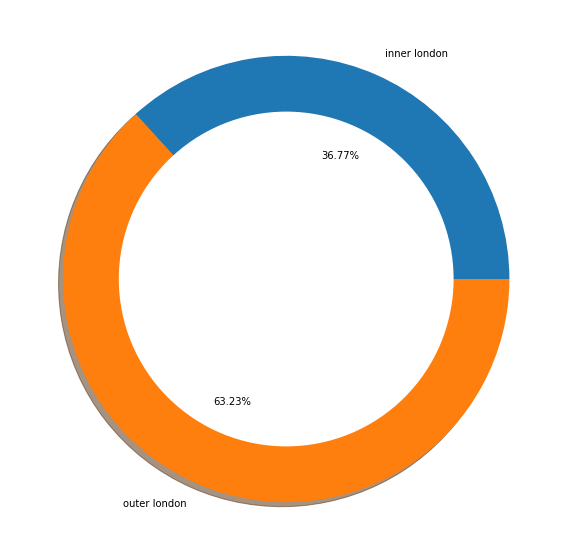

In [79]:
plt.figure(figsize=(10,10))
plt.axis("equal")

plt.pie(hou_sold.iloc[:, 1],
        labels=hou_sold.iloc[:, 0], 
        autopct='%0.2f%%', 
        shadow=True,);
        
circle1 = plt.Circle(xy = (0, 0), 
                     radius=0.75, 
                     facecolor= 'white');

plt.gca().add_artist(circle1)

# VIII) Subplot

Chức năng subplot là show nhiều hơn 1 đồ thị trong 1 lúc

In [84]:
X_randd = dataset1.iloc[:, 0].values
X_mar_spen = dataset1.iloc[:, 2].values
y_prof = dataset1.iloc[:, -1].values

## 1) Show 2 subplot in horizontal

## Thông số subplot:

fig : module hình (The figure module) là nơi chứa nguyên tố của plot

ax1, ax2 : Một đối tượng duy nhất của các trục (single object of the axes) nơi chứa các thông tin của các subplot.

Hai giá trị trên được tạo ra từ:

plt.subplots(
  
    nrows=1 : số lượng dòng thể hiện sẽ có bao nhiêu đổ thị xếp dọc, 
    
    ncols=2 : số lượng cột thể hiện sẽ có bao nhiêu đổ thị xếp ngang,

    sharey=True : bật chức năng chia sẻ thông tin cột y (tốt nhất áp dụng cho subplot ngang), 
    
    figsize=(20,10) ; size của cả hai biểu đồ

)

Đối với từng axis tương ứng với 1 sub đồ thị (sẽ có một số thông số như các đổ thị khác):

    ax1.scatter(X_randd, y_prof): với thông số đồ thị sẽ như thông số đồ thị thường

    ax1.set_xlabel('R&D') : với "xlabel" sẽ thay bằng "set_xlabel"

    ax1.set_ylabel('Profit') : với "ylabel" sẽ thay bằng "set_ylabel"

    ax1.set_title('50 Starup with R&D and Profit') : với "label" sẽ thay bằng "set_label"

Đối với từng axis còn lại (tương ứng với 1 sub đồ thị). Ta sẽ set thông số như trên nhưng giá trị theo mong muốn 

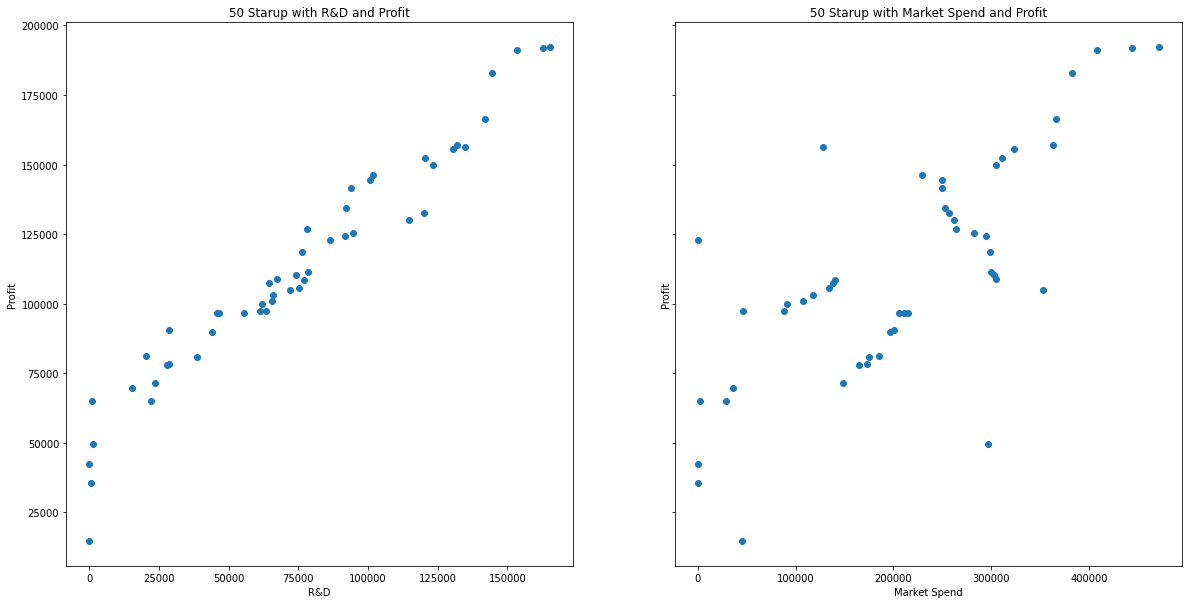

In [117]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(20,10))


ax1.scatter(X_randd, y_prof)
ax1.set_xlabel('R&D')
ax1.set_ylabel('Profit')
ax1.set_title('50 Starup with R&D and Profit')

ax2.scatter(X_mar_spen, y_prof)
ax2.set_xlabel('Market Spend')
ax2.set_ylabel('Profit')
ax2.set_title('50 Starup with Market Spend and Profit')


plt.show()


## 2) Show 2 subplot in vertical

## Với subplot xếp dọc em chỉ thay đổi thông số: 

  nrows=2, : số lượng dòng thể hiện sẽ có bao nhiêu đổ thị xếp dọc sẽ phải tăng
  
  ncols=1, số lượng cột thể hiện sẽ có bao nhiêu đổ thị xếp ngang sẽ thay đổi theo ý muốn chọn
  
  sharex=True : thay thế bằng share x do subplot theo chiều dọc

Đối với từng axis (tương ứng với 1 sub đồ thị). Ta sẽ set thông số như trên nhưng giá trị theo mong muốn

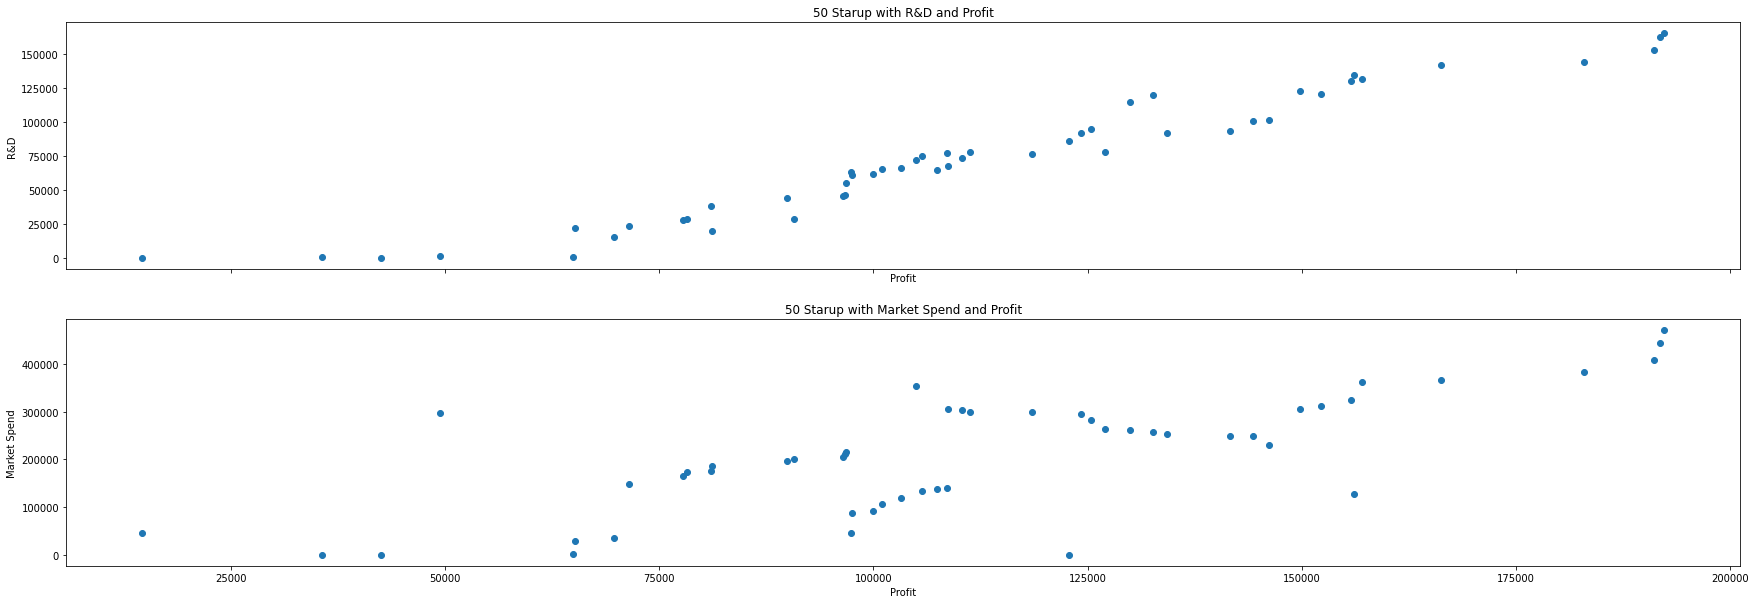

In [118]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(30,10))


ax1.scatter(y_prof, X_randd)
ax1.set_ylabel('R&D')
ax1.set_xlabel('Profit')
ax1.set_title('50 Starup with R&D and Profit')

ax2.scatter(y_prof, X_mar_spen)
ax2.set_ylabel('Market Spend')
ax2.set_xlabel('Profit')
ax2.set_title('50 Starup with Market Spend and Profit')


plt.show()


## 3) Show 2 separate subplot in one plot

## Khi tạo 2 subplot riêng biệt trong 1 plot

ta chỉ cần set thông số plt.subplots() cho mỗi axis khác nhau (tương ứng với 1 sub đồ thị)

Đối với từng axis (tương ứng với 1 sub đồ thị). Ta sẽ set thông số như trên nhưng giá trị theo mong muốn

### Công dụng:

khi ta muốn các subplot sẽ có sự khác biệt lớn đặc biệt là size để thể hiện các thông tin khác nhau

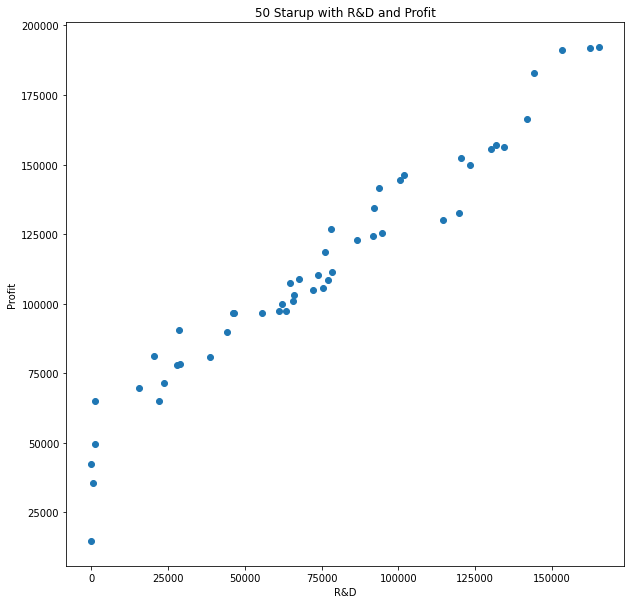

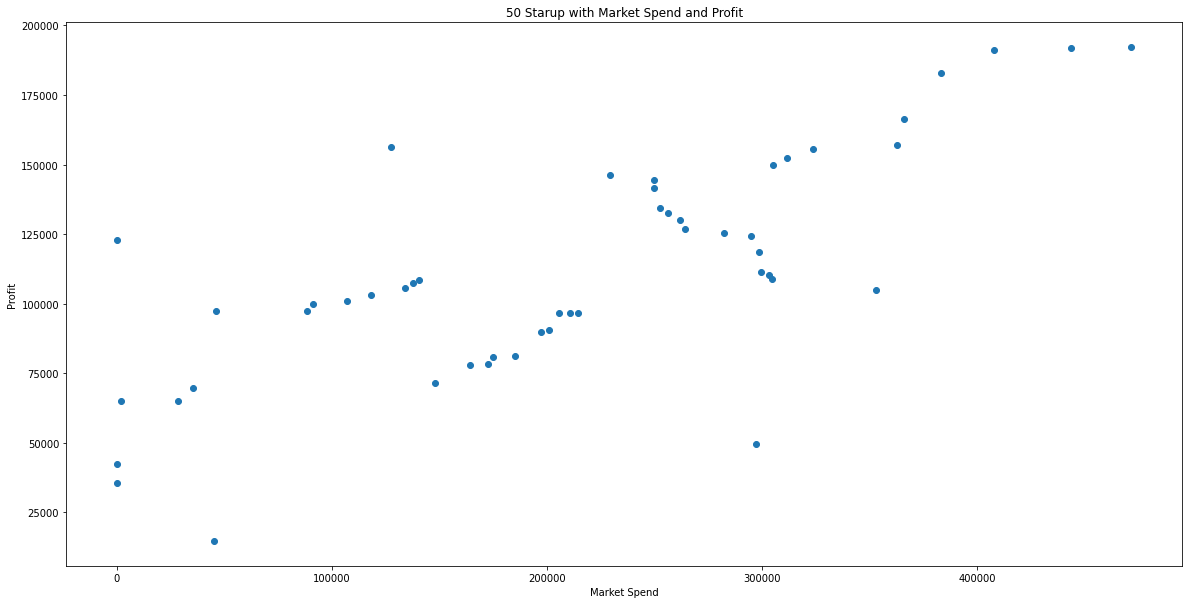

In [122]:
fig, ax1 = plt.subplots(figsize=(10,10))

fig, ax2 = plt.subplots(figsize=(20,10))

ax1.scatter(X_randd, y_prof)
ax1.set_xlabel('R&D')
ax1.set_ylabel('Profit')
ax1.set_title('50 Starup with R&D and Profit')

ax2.scatter(X_mar_spen, y_prof)
ax2.set_xlabel('Market Spend')
ax2.set_ylabel('Profit')
ax2.set_title('50 Starup with Market Spend and Profit')


plt.show()

# IX) Image show in plot

## Chức năng imshow():

  Sẽ được sử dụng để plot hình sử dụng nhiều trong computer vision, deep learning (CNN,...), reinforcement learning cho AI (OpenAI)

## library cần thiết:

    openCV : đọc hình ảnh

    pytesseract : đọc và nhận dạng văn bản trong hình ảnh và thường được sử dụng trong hình ảnh python ocr cho các trường hợp sử dụng văn bản

    resizeimage : để có thể thay đổi kích thước ảnh

    matplotlib.pyplot : để vẽ hình ra đồ thị

In [119]:
import cv2 as cv
import pytesseract
from resizeimage import resizeimage

## Thông số cho imshow():

pic = cv.imread('/content/drive/MyDrive/Data_Vitualization/Dataset/City.jpg') : tạo ra giá trị với openCV đọc ảnh "imread" với vị trí

plt.imshow(pic) : plot ra hình ảnh được đọc bởi giá trị open CV mới tạo

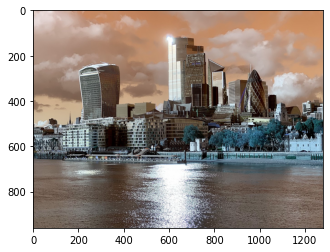

In [120]:
pic = cv.imread('/content/drive/MyDrive/Data_Vitualization/Dataset/City.jpg')
plt.imshow(pic)